## Q5

In [38]:
import numpy as np
import matplotlib.pyplot as plt

class stochasticBlockModel():
    def __init__(self, n = 100, p = 1, q = 0.1) -> None:
        assert p >= 0 and p <= 1
        assert q >= 0 and q <= 1
        self.n = n
        self.p = p
        self.q = q
        self.W = np.zeros((n, n))
        self.W[:n//2, :n//2] = np.random.binomial(1, p, (n//2, n//2))
        self.W[n//2:, n//2:] = np.random.binomial(1, p, (n//2, n//2))
        self.W[:n//2, n//2:] = np.random.binomial(1, q, (n//2, n//2))
        self.W[n//2:, :n//2] = np.random.binomial(1, q, (n//2, n//2))
        self.W = self.W - np.diag(np.diag(self.W))
        
    def getEigVecLaplacian(self):
        D = np.diag(np.sum(self.W, axis = 1))
        L = D - self.W
        eigVal, eigVec = np.linalg.eig(L)
        odred = np.argsort(eigVal)[::-1]
        eigVal = eigVal[odred]
        eigVec = eigVec[:, odred]
        return eigVal, eigVec
    
    def plot(self):
        plt.figure(figsize = (15, 3))
        plt.subplot(1, 5, 1)
        plt.imshow(self.W)
        plt.title("Adjacency, p = {:.1f}, q = {:.1f}".format(self.p, self.q))
        plt.xticks([])
        plt.yticks([])
        
        eigVal, eigVec = self.getEigVecLaplacian()
        plt.subplot(1, 5, 2)
        plt.plot(eigVal, '.')
        plt.title("Eigenvalues of Laplacian")
        plt.xlabel("Index")
        
        plt.subplot(1, 5, 3)
        plt.plot(eigVec[:, 0])
        plt.title("1st Eigenvector of Laplacian")
        
        plt.subplot(1, 5, 4)
        plt.plot(eigVec[:, 1])
        plt.title("2nd Eigenvector of Laplacian")
        
        plt.subplot(1, 5, 5)
        plt.plot(eigVec[:, 2])
        plt.title("3rd Eigenvector of Laplacian")
        
        
        plt.tight_layout()
        plt.show()
        
        

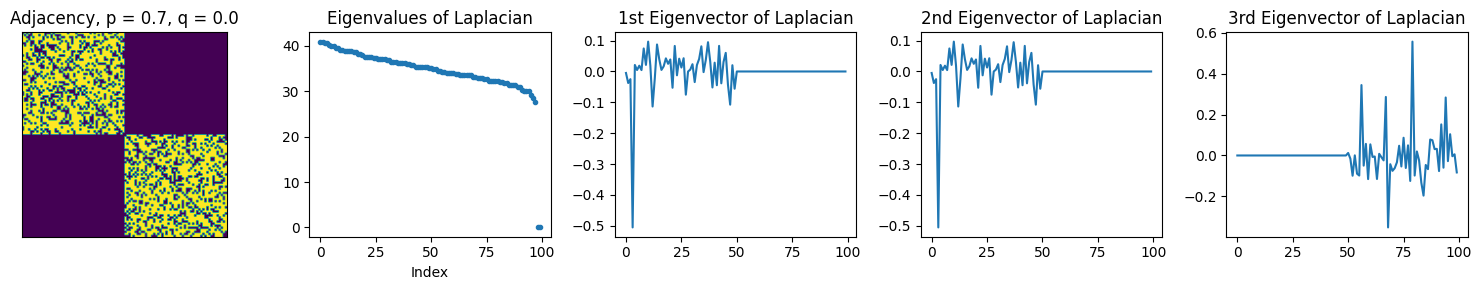

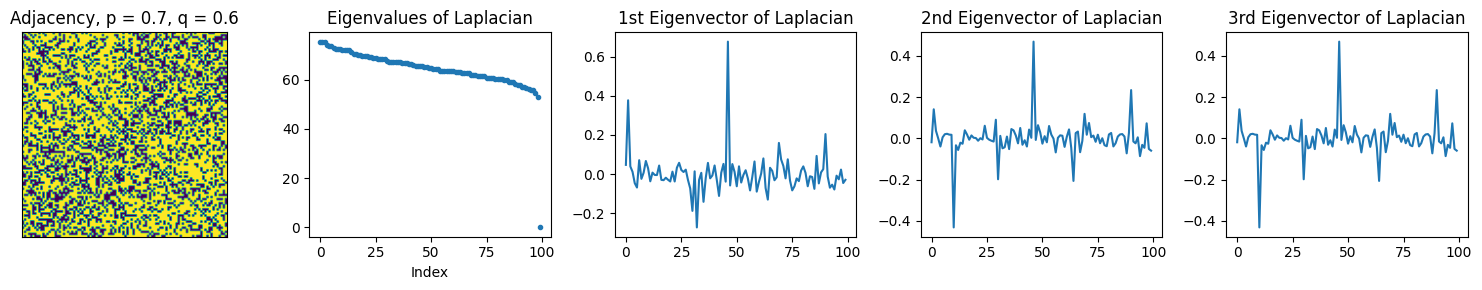

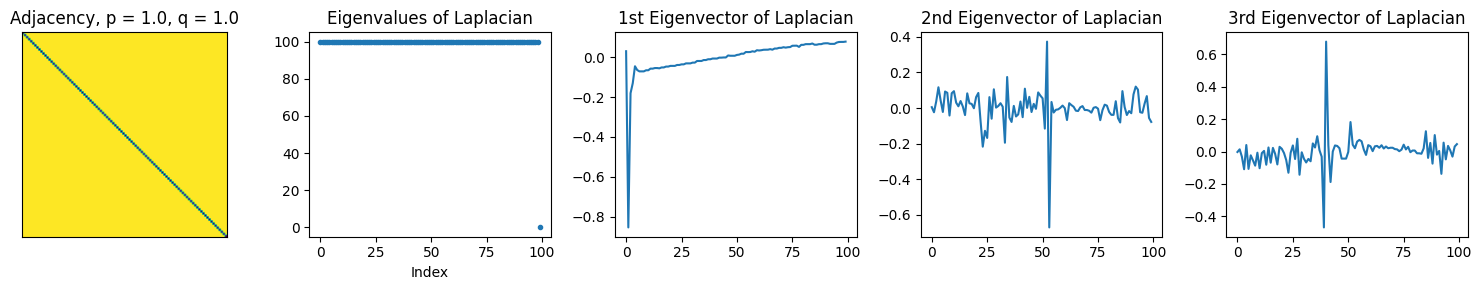

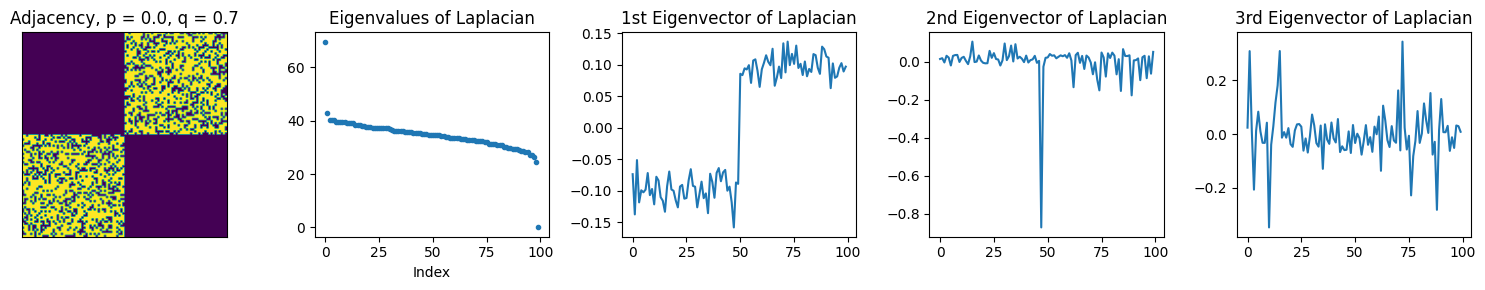

In [39]:
for (p, q) in [(0.7, 0), (0.7, 0.6), (1, 1), (0, 0.7)]:
    model = stochasticBlockModel(p = p, q = q)
    model.plot()